# Linear Regression

Import necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

BP to learn coefficients

In [69]:
def Linear_Regression(dataset, iter, lr):
    """
    input: 
        dataset is a dist, with dataset["x"].shape = (n, d) and dataset["y"].shape = (n), where n is the numebr of samples and d is the dimension of information
        iter: iteration times
        lr: learning rate

    output: coeffitient matrix theta, with theta.shape = (d + 1)
    """
    n, d = dataset["x"].shape
    theta = np.zeros(d+1)
    x = np.concatenate((np.ones([n, 1]), dataset["x"]), axis=1)
    y = dataset["y"]
    old_cost = -5
    new_cost = 0
    epsilon = 1e-5
    
    while(abs(old_cost - new_cost) < epsilon or iter > 0):
        old_cost = new_cost
        a = x @ theta.T - y
        new_cost = np.sum(a ** 2)
        d_theta = a.T @ x
        theta -= lr * d_theta
        iter -= 1

    return theta

calculate y

In [74]:
def cal_y(x, theta):
    """
    input: 
            x: dim = (n, d)
            theta: dim = d + 1 
    output:
            y
    """
    _, d = x.shape
    x = np.concatenate((np.ones(d).reshape(-1,1), x), axis=1)
    y = x @ theta.T
    
    return y[0]
    

plot dataset and line

In [76]:
def plot(dataset, theta):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(dataset["x"], dataset["y"], c='blue', marker='o')
    ax.set_title("Linear_Regression")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    _, d = dataset["x"].shape
    x1 = np.zeros([1, d])  
    y1 = cal_y(x1, theta)
    x2 = np.max(dataset["x"]).reshape(1, d)
    y2 = cal_y(x2, theta)
    ax.plot([0, x2[0][0]], [y1, y2])
    plt.show()

[9.71017714 1.03258747]


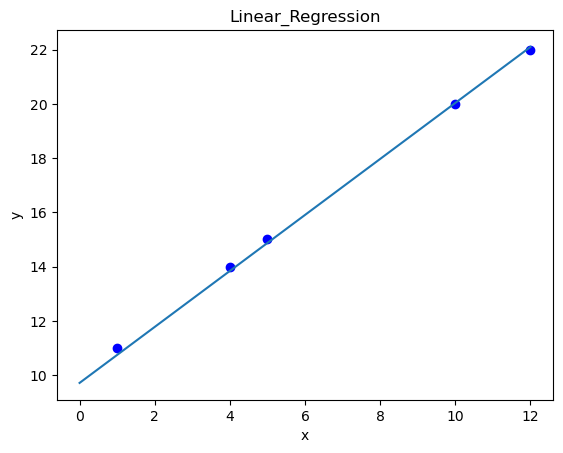

In [87]:
dataset = {}
dataset["x"] = np.array([1, 4, 5, 10, 12]).reshape(-1, 1)
dataset["y"] = np.array([11, 14, 15, 20, 22])
iter = 500
learning_rates = [0.005]
thetas = []
for learning_rate in learning_rates:
    theta = (Linear_Regression(dataset, iter, learning_rate))
    print(theta)
    plot(dataset, theta)
    thetas.append(theta)